In [2]:
from pathlib import Path
from metadata import ImageDataset, patient
import utils
import numpy as np
import pandas as pd

In [3]:
notebooks_path = Path.cwd()
repo_path = notebooks_path.parent
print(f'The current directory is: {notebooks_path}')

The current directory is: /home/ricardino/Documents/MAIA/tercer_semestre/MISA/final_project/MISA_FINAL_PROJECT/notebooks


# MAIN

In [8]:

#we will compute the boxplot for the following models
# model_list = ['TModel_dice_Validation', 'most_similar_dice', 'mean_atlas_dice', 'weighted_labels_dice', 'top_atlases_dice', 'bayesian_dice', 'unet_dice']
model_list = ['TModel_metrics_Validation', 'most_similar_metrics', 'mean_atlas_metrics', 'weighted_labels_metrics', 'top_atlases_metrics', 'bayesian_metrics',
              'EM_bayesian_metrics', 'EM_kmeans_metrics']
#we first concatenate all the csv files in a single dataframe
general_df = None
for model in model_list:
    #read csv file
    df = pd.read_csv(repo_path /'data' / 'results' / f'{model}.csv')
    #drop all columns except id_val and the tissue
    df = df.drop(columns=[col for col in df.columns if col not in ['id_val', 'CSF', 'GM', 'WM', 'metric']])
    #we add a column with the model name
    df['model'] = model
    #concatenate df in general_df
    general_df = pd.concat([general_df, df], axis=0)

#remove 'metrics' string from the model column
general_df['model'] = general_df['model'].str.replace('_metrics', '').str.replace('_', ' ')
general_df


,id_val,CSF,GM,WM,metric,model
0,11,0.204935,0.884896,0.906621,dice,TModel Validation
1,11,55.398556,16.911535,12.727922,hd,TModel Validation
2,11,-0.684423,-0.118016,0.025525,vdiff,TModel Validation
3,12,0.150694,0.888044,0.878158,dice,TModel Validation
4,12,53.509345,15.937377,10.488088,hd,TModel Validation
...,...,...,...,...,...,...
10,14,52.497991,15.643614,11.503396,hd,EM kmeans
11,14,-1.336326,-0.161750,0.374015,vdiff,EM kmeans
12,17,0.240287,0.856522,0.681684,dice,EM kmeans
13,17,52.147340,15.465802,25.559349,hd,EM kmeans


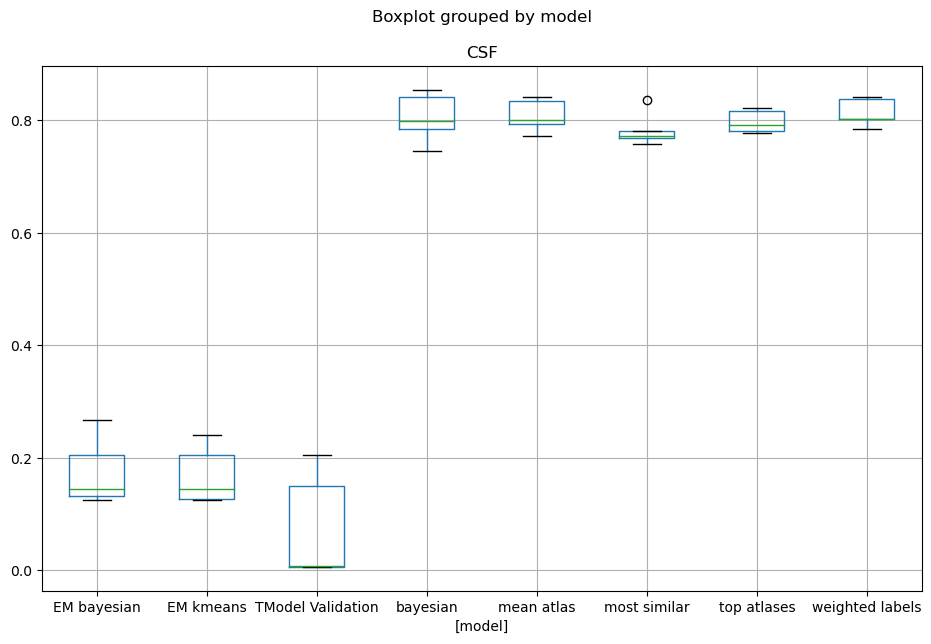

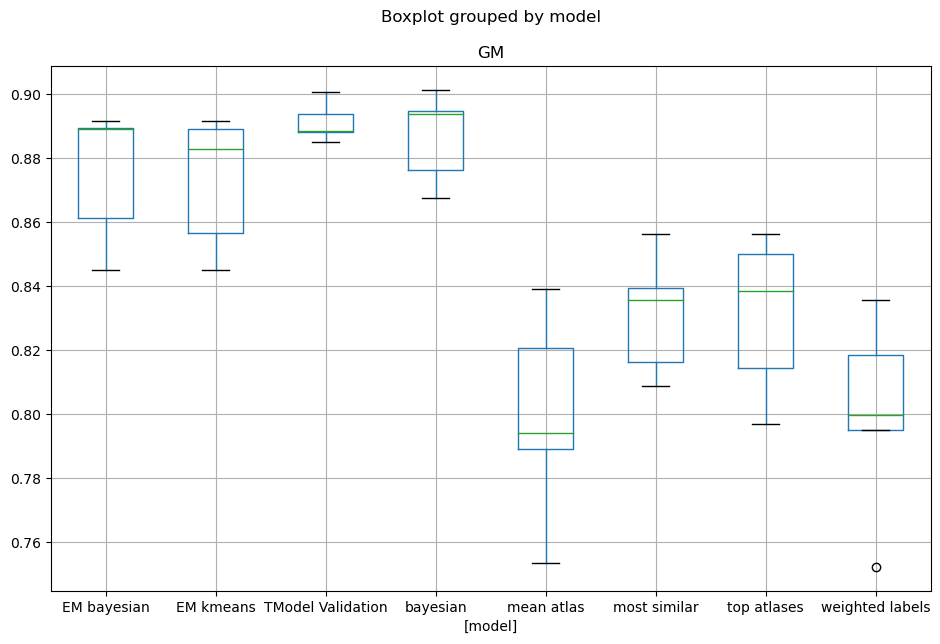

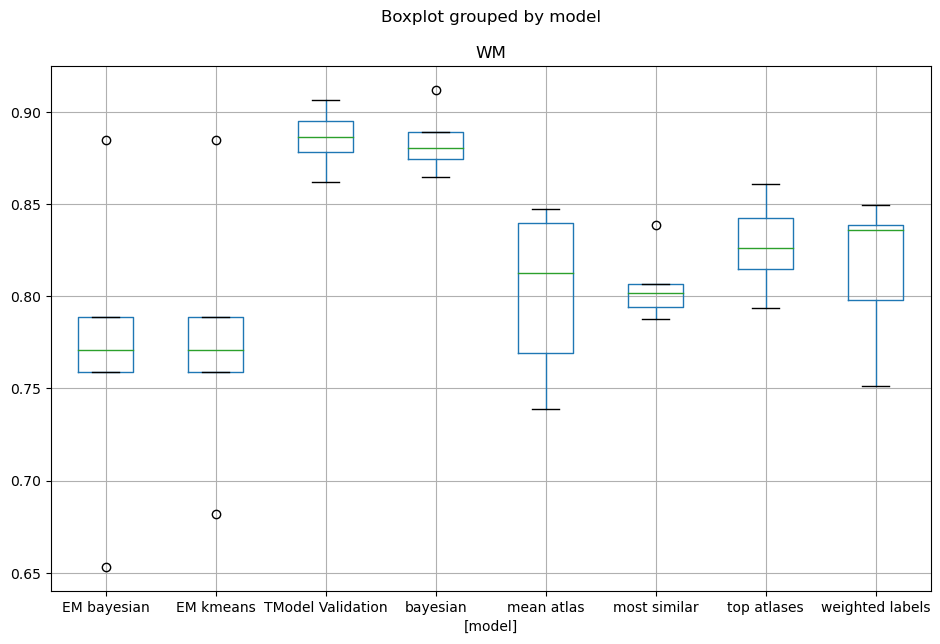

In [11]:
metric = 'dice'
group = 'model'

#we first drop all rows that are not of the metric
metriced_df = general_df[general_df['metric'] == metric]
#we now compute the boxplot for each tissue
for tissue in ['CSF', 'GM', 'WM']:
    #we select the tissue
    df_tissue = metriced_df[[tissue, group]]
    #now we compute the boxplot
    df_tissue.boxplot(by=group, figsize=(11, 7))